In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_excel('PE_Try.xlsx')

# Display the first few rows of the dataset
print(df.head())
print(df.describe())  # To understand the distributions and range of feature 'A'

   Temperature      pH   Methane  Result
0        20.00  5.0000  0.000000       0
1        20.08  4.9875  0.005917       0
2        20.16  4.9750  0.011834       0
3        20.24  4.9625  0.017751       0
4        20.32  4.9500  0.023669       0
       Temperature           pH      Methane       Result
count  1164.000000  1164.000000  1164.000000  1164.000000
mean     43.285524     7.192699     2.065172     1.017182
std      14.953896     1.137215     1.077858     0.895031
min      20.000000     4.000000     0.000000     0.000000
25%      29.607500     7.011643     1.378468     0.000000
50%      41.930000     7.117306     2.000000     1.000000
75%      55.560000     7.937533     2.844948     2.000000
max      70.050000     8.830000     4.100000     3.000000


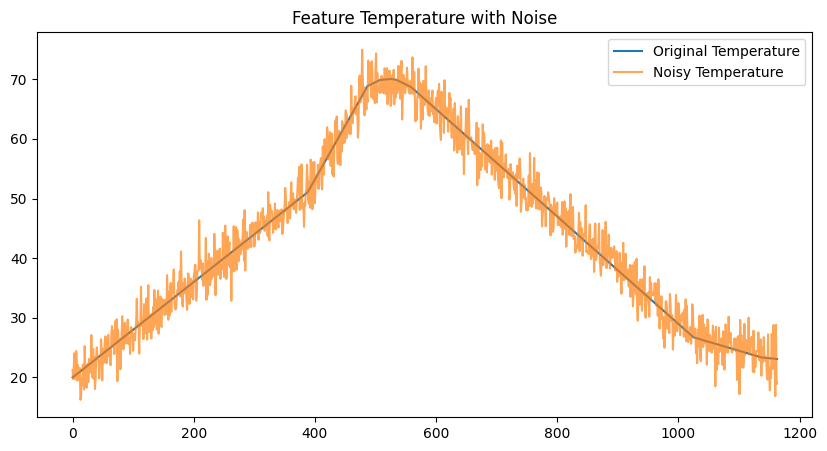

In [48]:
# Assuming feature 'A' exists in the DataFrame
np.random.seed(42)  # For reproducibility
noise = np.random.normal(loc=0, scale=2.5, size=len(df))
df['Temperature_noisy'] = df['Temperature'] + noise

# Optionally plot the original and noisy data to visualize the effect
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Temperature'], label='Original Temperature')
plt.plot(df['Temperature_noisy'], label='Noisy Temperature', alpha=0.7)
plt.legend()
plt.title('Feature Temperature with Noise')
plt.show()


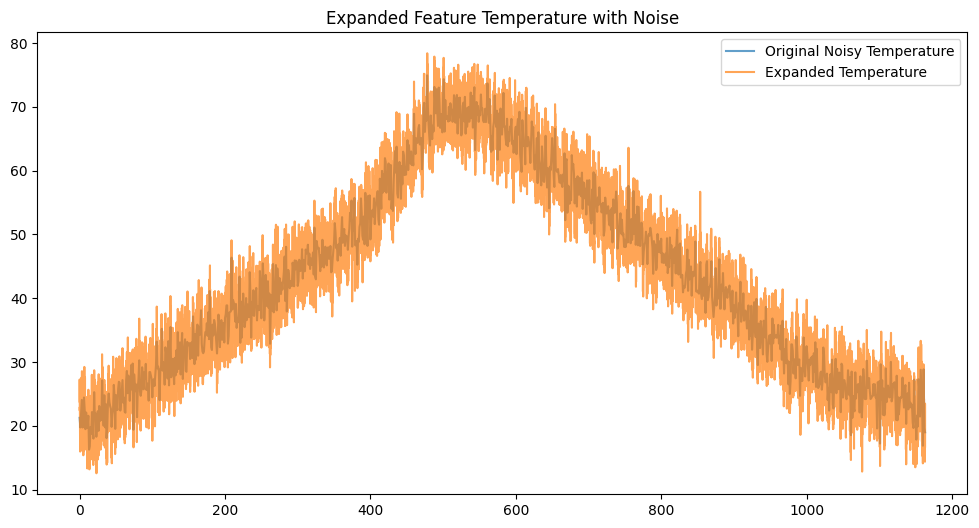

In [49]:
# Create an empty DataFrame with the desired length
new_index = np.linspace(df.index.min(), df.index.max(), 20000)
expanded_df = pd.DataFrame(index=new_index)

# Interpolate 'A_noisy'
expanded_df['Temperature_interpolated'] = np.interp(new_index, df.index, df['Temperature_noisy'])

# Add noise to the interpolated values
new_noise = np.random.normal(loc=0, scale=2.5, size=len(expanded_df))
expanded_df['Temperature_final'] = expanded_df['Temperature_interpolated'] + new_noise

# Plot to visualize
plt.figure(figsize=(12, 6))
plt.plot(df['Temperature_noisy'], label='Original Noisy Temperature', alpha=0.7)
plt.plot(expanded_df['Temperature_final'], label='Expanded Temperature', alpha=0.7)
plt.legend()
plt.title('Expanded Feature Temperature with Noise')
plt.show()


In [55]:
# Add noise to feature 'B'
np.random.seed(42)
noise_pH = np.random.normal(loc=0, scale=0.6, size=len(df))  # std dev of 0.6 to keep max noise around 1.2
df['pH_noisy'] = df['pH'] + noise_pH

# Interpolating and adding noise
expanded_df['pH_interpolated'] = np.interp(new_index, df.index, df['pH_noisy'])
new_noise_pH = np.random.normal(loc=0, scale=0.6, size=len(expanded_df))
expanded_df['pH_final'] = expanded_df['pH_interpolated'] + new_noise_pH


In [56]:
# Add noise to feature 'C'
np.random.seed(42)
noise_c = np.random.normal(loc=0, scale=2.5, size=len(df))  # std dev of 0.25 to keep max noise around 0.5
df['Methane_noisy'] = df['Methane'] + noise_c
df['Methane_noisy'] = df['Methane_noisy'].clip(lower=0)  # Ensure no negative values

# Interpolating and adding noise
expanded_df['Methane_interpolated'] = np.interp(new_index, df.index, df['Methane_noisy'])
new_noise_Methane = np.random.normal(loc=0, scale=0.25, size=len(expanded_df))
expanded_df['Methane_final'] = expanded_df['Methane_interpolated'] + new_noise_Methane
expanded_df['Methane_final'] = expanded_df['Methane_final'].clip(lower=0)  # Ensure no negative values


In [57]:
# Creating the noise_df with final noisy data
noise_df = pd.DataFrame({
    'Temperature': expanded_df['Temperature_final'],
    'pH': expanded_df['pH_final'],
    'Methane': expanded_df['Methane_final']
})

# Show some data to verify
print(noise_df.head())


          Temperature        pH   Methane
0.000000    23.798211  5.911571  1.497428
0.058153    27.253504  6.738998  1.779510
0.116306    24.527143  6.082827  1.443427
0.174459    22.388571  5.567727  1.166122
0.232612    22.378022  5.563351  1.101620


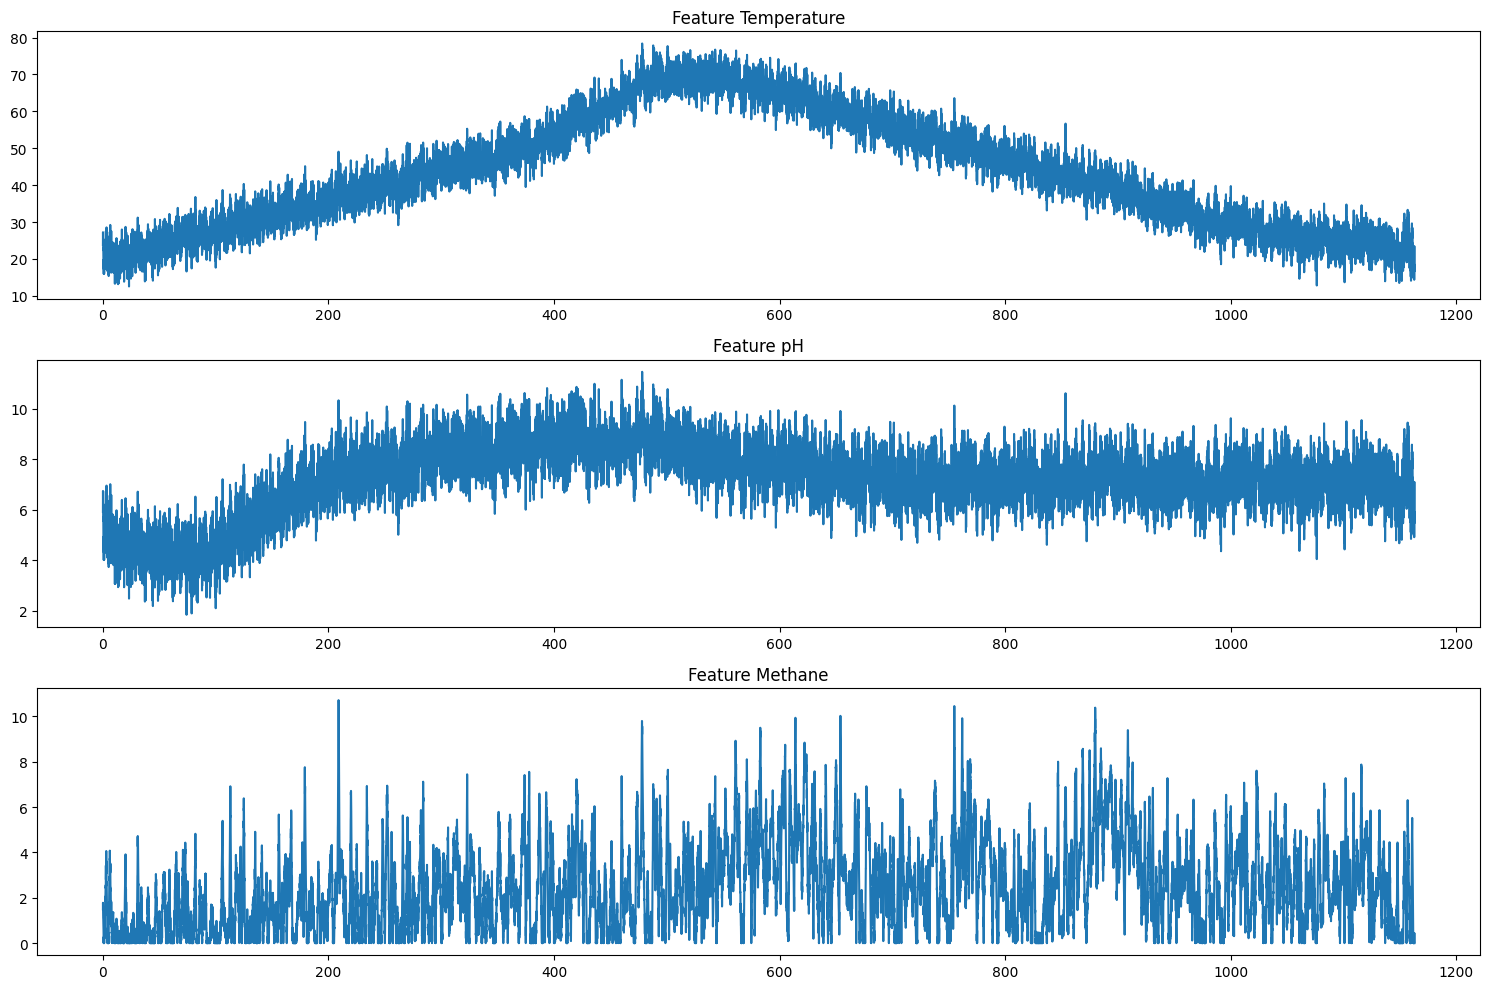

In [58]:
plt.figure(figsize=(15, 10))

plt.subplot(311)
plt.plot(expanded_df['Temperature_final'], label='Noisy Temperature')
plt.title('Feature Temperature')

plt.subplot(312)
plt.plot(expanded_df['pH_final'], label='Noisy pH')
plt.title('Feature pH')

plt.subplot(313)
plt.plot(expanded_df['Methane_final'], label='Noisy Methane')
plt.title('Feature Methane')

plt.tight_layout()
plt.show()


In [59]:
print(noise_df.shape)

(20000, 3)


In [35]:
noise_df.to_csv('Check.csv', index=False)

In [60]:
import pandas as pd
import numpy as np

# Assuming `noise_df` is your DataFrame with 20,000 samples
num_samples = len(noise_df)

# Calculate the proportion of each result class in the original dataset
original_counts = [391, 823-391, 1099-823, 1176-1099]  # intervals from your description
total_original = 1176
proportions = [count / total_original for count in original_counts]

# Calculate the new indices based on proportions
new_indices = [int(num_samples * prop) for prop in proportions]

# We need cumulative sums to set the correct ranges in the new DataFrame
cumulative_indices = np.cumsum([0] + new_indices)

# Assign the results
noise_df['result'] = 0  # Initialize all to zero
for i, result in enumerate([0, 1, 3, 4]):
    start_idx = cumulative_indices[i]
    end_idx = cumulative_indices[i+1]
    noise_df.loc[start_idx:end_idx, 'result'] = result

# Print the distribution of results to confirm
print(noise_df['result'].value_counts())


result
0    20000
Name: count, dtype: int64


In [30]:
print(noise_df.shape)

(20000, 4)


In [31]:
print(noise_df.head)

<bound method NDFrame.head of              Temperature        pH   Methane  result
0.000000       23.798211  5.911571  0.379821       0
0.058153       27.253504  6.738998  0.726895       0
0.116306       24.527143  6.082827  0.455804       0
0.174459       22.388571  5.567727  0.243492       0
0.232612       22.378022  5.563351  0.243982       0
...                  ...       ...       ...     ...
1162.767388    18.610040  5.929719  0.000000       0
1162.825541    14.357398  4.909221  0.000000       0
1162.883694    18.598492  5.927220  0.000000       0
1162.941847    23.474063  7.097493  0.445979       0
1163.000000    16.736578  5.480633  0.000000       0

[20000 rows x 4 columns]>


In [62]:
# Export noise_df to a CSV file
noise_df.to_csv('PE_Noise_Try.csv', index=False)


In [66]:
synth_df = pd.read_csv('PE_Noise_Try.csv')

In [67]:
from sklearn.model_selection import train_test_split

# Assume 'result' is the target column
X = synth_df.drop('result', axis=1)  # Features
y = synth_df['result']               # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize and fit the Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [69]:
# Predict on the test set
y_pred = gb.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.93


In [70]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit the Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)


Logistic Regression Accuracy: 0.801


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.93775
